# Global Energy Budget

Let's read a netcdf file that include information on global energy budget. <br>
First, let's import modules that we will be using.

In [28]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

Open and read the outgoing longwave radiation (OLR) file 'olr_mean_regrid.nc'. This file can be downloaded from Canvas/files/data.

Plot incoming shortwave radiation. Let's first read the file 'toa_sw.nc' <br>

In [29]:
filename='toa_sw.nc' 
with xr.open_dataset(filename2) as ds:      
    print(ds)

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Data variables:
    tsr        (time, latitude, longitude) float32 ...
    tisr       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2017-10-10 16:27:43 GMT by grib_to_netcdf-2.4.0: grib_to_ne...


In [30]:
swn=ds.tsr/24./3600. # TOA net solar radiation in W/m2
swd=ds.tisr/24./3600. # TOA incident solar radiation in W/m2

In [31]:
albedo=(swd-swn)/swd*100

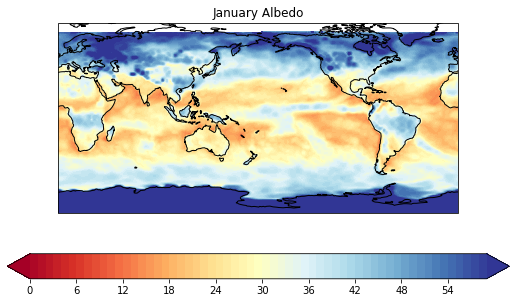

In [37]:
# Plot January albedo
lev1=np.arange(0,60,1)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=albedo.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=lev1,cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('January Albedo')
fig1.colorbar(cs, orientation='horizontal') # color map

#### Exercise
Plot July albedo and compare it with the January albedo.

### Annual average albedo

In [33]:
# Annual average albedo
swd_ann=swd.mean(dim='time')
swn_ann=swn.mean(dim='time')
albedo_ann=(swd_ann-swn_ann)/swd_ann*100

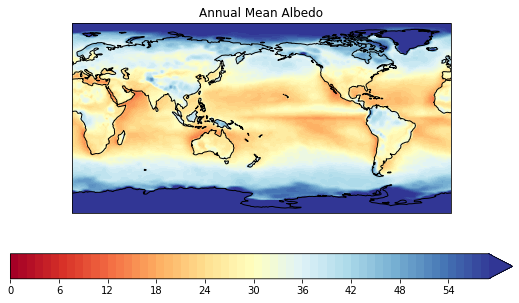

In [38]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs2=albedo_ann.plot.contourf(ax=ax2, transform=ccrs.PlateCarree(), levels=lev1,cmap=cmap1, add_colorbar=False, add_labels=False)
ax2.coastlines()
plt.title('Annual Mean Albedo')
fig2.colorbar(cs2, orientation='horizontal') # color map